<a href="https://colab.research.google.com/github/MattiaPOLI/DR14/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf DR14
!git clone https://github.com/MattiaPOLI/DR14.git

Cloning into 'DR14'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 290 (delta 10), reused 0 (delta 0), pack-reused 272
Receiving objects: 100% (290/290), 3.22 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (154/154), done.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



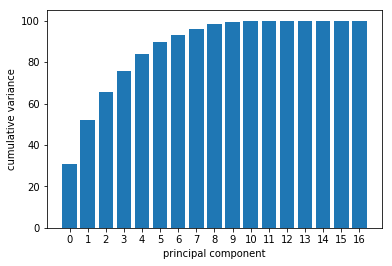

In [2]:
from DR14 import CommonTools

X, y = CommonTools.get_raw_dataset()
Xpca = CommonTools.variance_pca(X, True)

In [3]:
import plotly.graph_objs as go
import numpy as np
import plotly

index = 0
label = np.zeros(shape = [len(y)])

for line in y:
  if line == "STAR":
    label[index] = 0
  elif line == "GALAXY":
    label[index] = 1
  else:
    label[index] = 2
  index = index + 1

trace = go.Scatter(
    x = Xpca[:, 0],
    y = Xpca[:, 1],
    mode = "markers",
    marker = dict(
        color = label,
        colorscale = CommonTools.pl_colorscale,
        colorbar = dict(
            title = "Labels",
            tickvals = [0, 1, 2],
            ticktext = ["Star", "Galaxy", "Quasar"]
        )
    )
)
fig = go.Figure(data = [trace])
CommonTools.enable_plotly_in_cell()
plotly.offline.iplot(fig, filename="1vs2")